In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [5]:
import seaborn as sns
from statistics import stdev
import matplotlib.pyplot as plt
import math

In [6]:
df=pd.read_csv("../input/iris/Iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Q)  you have to predict the class of a given input point(flower) by training your model on the Iris Dataset

**Input Point**

**{SL=4.7, SW=3.7,PL=2,PW=0.3}**

In [8]:
SL=4.7
SW=3.7
PL=2
PW=0.3

In [9]:
df['Species'].nunique()

3

In [10]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

There is three species in total

we hava to find :

P(versicolor|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|versicolor)P(SW=3.7|versicolor)P(PW=0.3|versicolor)P(PL=2|versicolor)P(versicolor)

P(setosa|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|setosa)P(SW=3.7|setosa)P(PW=0.3|setosa)P(PL=2|setosa)P(setosa)

P(virginica|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|virginica)P(SW=3.7|virginica)P(PW=0.3|virginica)P(PL=2|virginica)P(virginica)

In [11]:
#P(versicolor)
#P(setosa)
#P(virginica)

pver=50/150
pset=50/150
pvir=50/150

In [12]:
df_ver=df[df['Species']=='Iris-versicolor']
df_set=df[df['Species']=='Iris-setosa']
df_vir=df[df['Species']=='Iris-virginica']

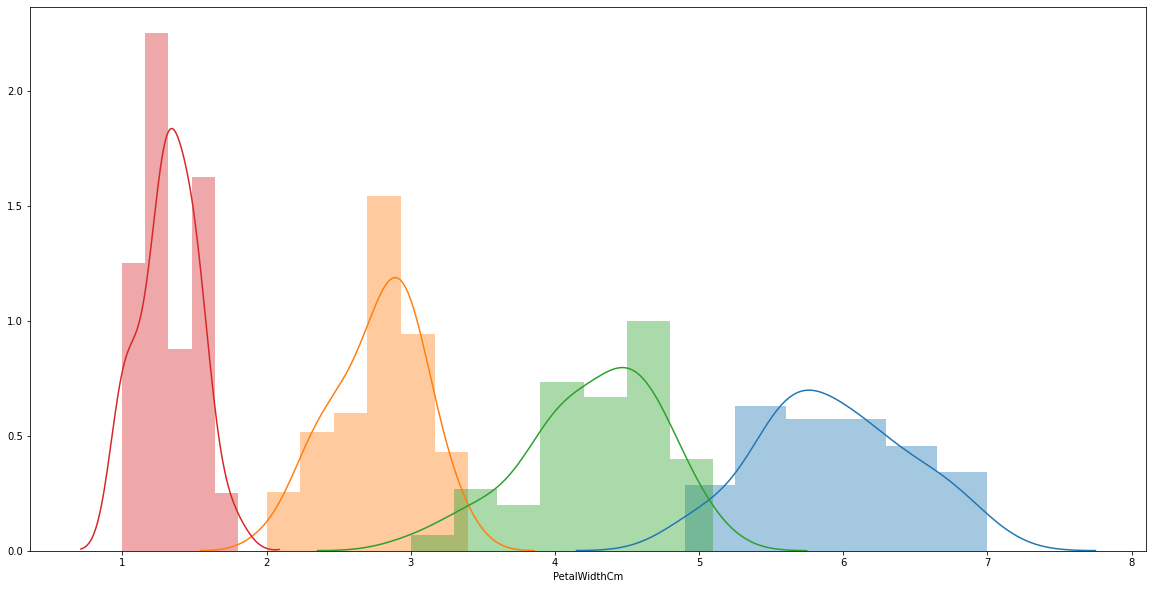

In [13]:
plt.figure(figsize=(20,10))
sns.distplot(df_ver['SepalLengthCm'])
sns.distplot(df_ver['SepalWidthCm'])
sns.distplot(df_ver['PetalLengthCm'])
sns.distplot(df_ver['PetalWidthCm'])

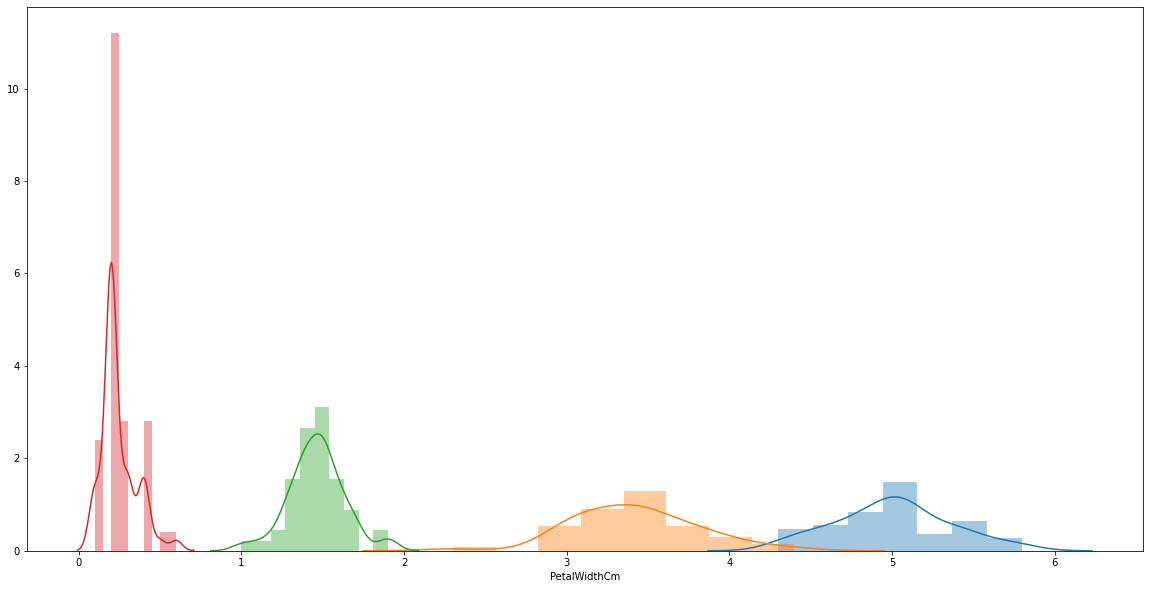

In [14]:
plt.figure(figsize=(20,10))
sns.distplot(df_set['SepalLengthCm'])
sns.distplot(df_set['SepalWidthCm'])
sns.distplot(df_set['PetalLengthCm'])
sns.distplot(df_set['PetalWidthCm'])

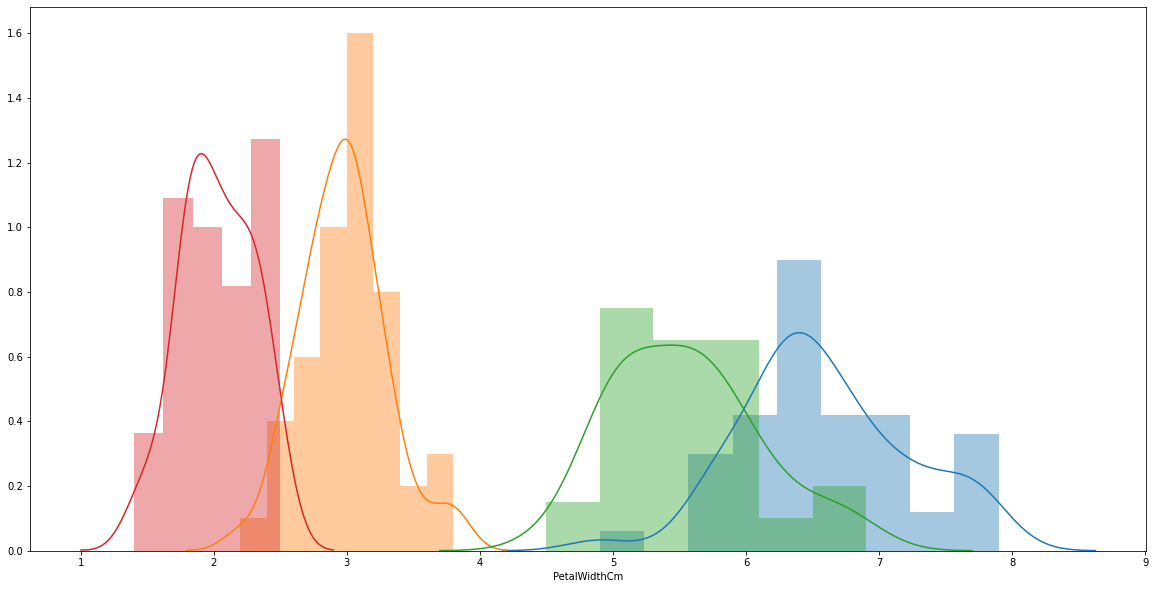

In [15]:
plt.figure(figsize=(20,10))
sns.distplot(df_vir['SepalLengthCm'])
sns.distplot(df_vir['SepalWidthCm'])
sns.distplot(df_vir['PetalLengthCm'])
sns.distplot(df_vir['PetalWidthCm'])

**all are in normal distribution**

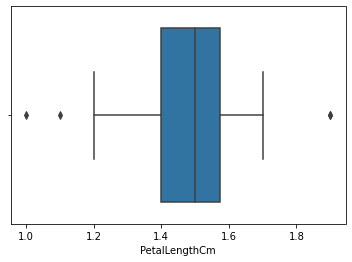

In [16]:
sns.boxplot(df_set['PetalLengthCm'])

In [17]:
df_set[(df_set['PetalLengthCm']<1.2) | (df_set['PetalLengthCm']>1.7)] #outliers of setosa PL

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
13,14,4.3,3.0,1.1,0.1,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
44,45,5.1,3.8,1.9,0.4,Iris-setosa


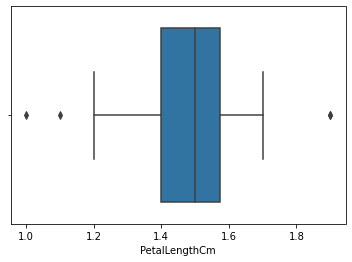

In [18]:
sns.boxplot(df_set['PetalLengthCm'])

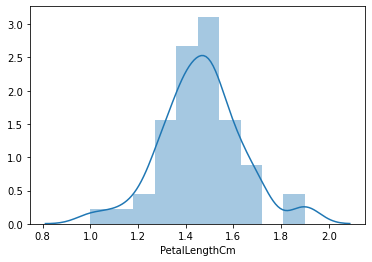

In [19]:
sns.distplot(df_set['PetalLengthCm'])

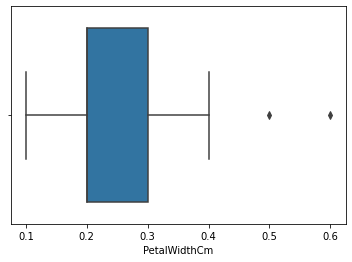

In [20]:
sns.boxplot(df_set['PetalWidthCm'])

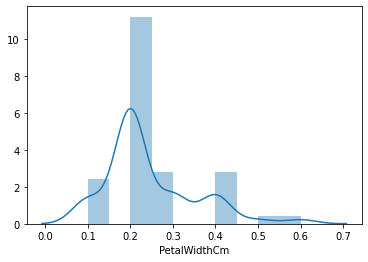

In [21]:
sns.distplot(df_set['PetalWidthCm'])

In [22]:
df_set[df_set['PetalWidthCm']>0.4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
23,24,5.1,3.3,1.7,0.5,Iris-setosa
43,44,5.0,3.5,1.6,0.6,Iris-setosa


In [23]:
#function for finding normal distribution

def normal(x,y,z):
    return ((math.exp((-((x*x)+(y*y)-(2*x*y)))/2*z*z))/(z*1.414*3.14))

**#P(versicolor|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|versicolor)P(SW=3.7|versicolor)P(PW=0.3|versicolor)P(PL=2|versicolor)P(versicolor)**

**Using naive bayes approach:**

In [24]:
#P(versicolor|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|versicolor)P(SW=3.7|versicolor)P(PW=0.3|versicolor)P(PL=2|versicolor)P(versicolor)

#P(SL=4.7|versicolor)
mean_SL_ver=df_ver['SepalLengthCm'].mean()
sd_SL_ver=df_ver['SepalLengthCm'].std()
pslver=normal(SL,mean_SL_ver,sd_SL_ver)

#P(SW=3.7|versicolor)
mean_SW_ver=df_ver['SepalWidthCm'].mean()
sd_SW_ver=df_ver['SepalWidthCm'].std()
pswver=normal(SW,mean_SW_ver,sd_SW_ver)

#P(PL=2|versicolor)
mean_PL_ver=df_ver['PetalLengthCm'].mean()
sd_PL_ver=df_ver['PetalLengthCm'].std()
pplver=normal(PL,mean_PL_ver,sd_PL_ver)

#P(PW=0.3|versicolor)
mean_PW_ver=df_ver['PetalWidthCm'].mean()
sd_PW_ver=df_ver['PetalWidthCm'].std()
ppwver=normal(PW,mean_PW_ver,sd_PW_ver)

pversicolor=pslver*pswver*ppwver*pplver*pver
pversicolor

0.024834465193393957

**P(setosa|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|setosa)P(SW=3.7|setosa)P(PW=0.3|setosa)P(PL=2|setosa)P(setosa)**

In [25]:
#P(setosa|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|setosa)P(SW=3.7|setosa)P(PW=0.3|setosa)P(PL=2|setosa)P(setosa)

#P(SL=4.7|setosa)
mean_SL_set=df_set['SepalLengthCm'].mean()
sd_SL_set=df_set['SepalLengthCm'].std()
pslset=normal(SL,mean_SL_set,sd_SL_set)

#P(SW=3.7|setosa)
mean_SW_set=df_set['SepalWidthCm'].mean()
sd_SW_set=df_set['SepalWidthCm'].std()
pswset=normal(SW,mean_SW_set,sd_SW_set)

#P(PW=0.3|setosa)P(PL=2|setosa)P(setosa)
mean_PW_set=df_set['PetalWidthCm'].mean()
sd_PW_set=df_set['PetalWidthCm'].std()
ppwset=normal(PW,mean_PW_set,sd_PW_set)

#P(PL=2|setosa)
mean_PL_set=df_set['PetalLengthCm'].mean()
sd_PL_set=df_set['PetalLengthCm'].std()
pplset=normal(PL,mean_PL_set,sd_PL_set)

psetosa=pslset*pswset*ppwset*pplset*pset
psetosa

0.337896158612323

**P(virginica|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|virginica)P(SW=3.7|virginica)P(PW=0.3|virginica)P(PL=2|virginica)P(virginica)**

In [26]:
#P(virginica|SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7|virginica)P(SW=3.7|virginica)P(PW=0.3|virginica)P(PL=2|virginica)P(virginica)

#P(SL=4.7|virginica)
mean_SL_vir=df_vir['SepalLengthCm'].mean()
sd_SL_vir=df_vir['SepalLengthCm'].std()
pslvir=normal(SL,mean_SL_vir,sd_SL_vir)

#P(SW=3.7|virginica)
mean_SW_vir=df_vir['SepalWidthCm'].mean()
sd_SW_vir=df_vir['SepalWidthCm'].std()
pswvir=normal(SW,mean_SW_vir,sd_SW_vir)

#P(PW=0.3|virginica)
mean_PW_vir=df_vir['PetalWidthCm'].mean()
sd_PW_vir=df_vir['PetalWidthCm'].std()
ppwvir=normal(PW,mean_PW_vir,sd_PW_vir)

#P(PL=2|virginica)
mean_PL_vir=df_vir['PetalLengthCm'].mean()
sd_PL_vir=df_vir['PetalLengthCm'].std()
pplvir=normal(PL,mean_PL_vir,sd_PL_vir)

pvirginica=pslvir*pswvir*ppwvir*pplvir*pvir
pvirginica

0.0017087483078535022

# Predicting :-

In [27]:
def maxi(a, b, c): 
  
    if (a >= b) and (a >= c): 
        largest = a 
  
    elif (b >= a) and (b >= c): 
        largest = b 
    else: 
        largest = c 
          
    return largest 

In [28]:
maxi(pversicolor,psetosa,pvirginica)

0.337896158612323

- Considering all are in normal distribution 
- Altough all are not in normal distribution but close to normal distribution 
- PL & PW of setosa may not be in normal distribution

# Conclusion :-

- Which means our model is predicting setosa